In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
import sys
sys.path.append("../filtering/")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from visualizations import plot_covariance_ellipse
from helpers import vec

[[ 0.         -0.40200952  0.40200952  0.58171157 -0.58171157]
 [ 0.          0.16651779 -0.16651779  1.40437596 -1.40437596]]
[-3.  1.  1.  1.  1.]
[-0.25  1.    1.    1.    1.  ]


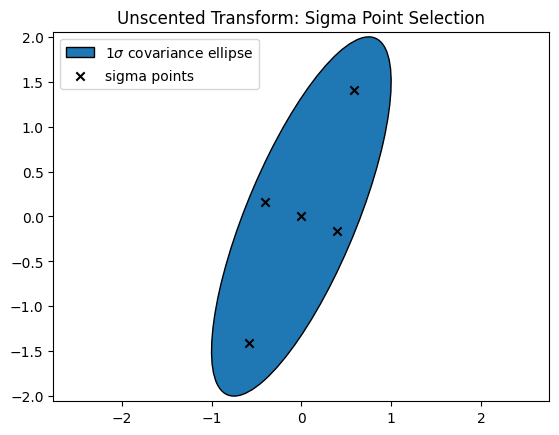

In [8]:
from sigma_points import StandardSigmaPointSelector
from matrix_square_root import *

# selector = StandardSigmaPointSelector(alpha=0.3, mat_sqrt_alg=mat_sqrt_cholesky)
selector = StandardSigmaPointSelector(alpha=0.5, mat_sqrt_alg=mat_sqrt_eigen)

mean = vec(0, 0)
cov = np.array([
    [1.0, 1.5],
    [1.5, 4.0]
])

sigma_points, weights_mean, weights_cov = selector.select_sigma_points(mean, cov)
print(sigma_points)
print(weights_mean)
print(weights_cov)

plt.title("Unscented Transform: Sigma Point Selection")
plt.axis("equal")
plot_covariance_ellipse(plt.gca(), mean, cov, edgecolor="black", label="$1\sigma$ covariance ellipse")
plt.scatter(sigma_points[0], sigma_points[1], color="black", marker="x", label="sigma points")
plt.legend()

In [9]:
mean_hat = np.sum(weights_mean * sigma_points)
cov_hat = weights_cov * (sigma_points - mean_hat) @ (sigma_points - mean_hat).T

print(mean_hat)
print(cov_hat)

0.0
[[1.  1.5]
 [1.5 4. ]]
